In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

from cpyment import CModel

In [14]:
cm = CModel('SIR')
cm.set_coupling_rate('S*I', 0.3, 'beta')
cm.set_coupling_rate('I:I=>R', 0.1, 'gamma')

In [46]:
dbeta = 0.0
dgamma = 0.0

cmmod = CModel('SIR')
cmmod.set_coupling_rate('S*I', 0.3+dbeta, 'beta')
cmmod.set_coupling_rate('I:I=>R', 0.1+dgamma, 'gamma')

In [72]:
t = np.linspace(0, 100, 1000)
y0 = np.array([0.99, 0.01, 0])

dy0 = np.array([-0.002, 0.002, 0])

traj = cm.integrate(t, y0, use_gradient=True)
trajmod = cmmod.integrate(t, y0+dy0)

<IPython.core.display.Javascript object>


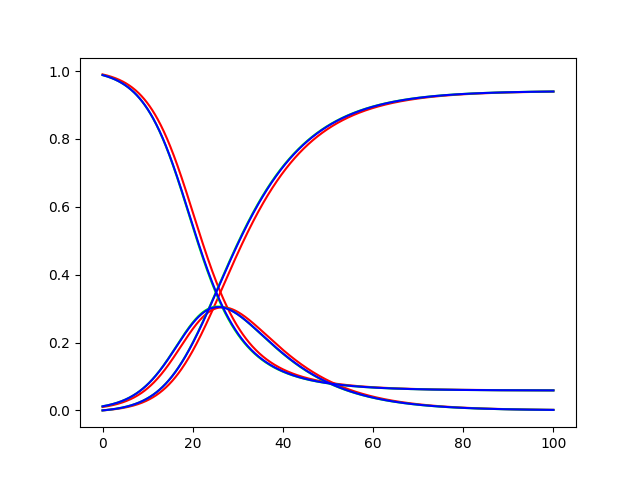

In [73]:
fig, ax = plt.subplots()

ax.plot(t, traj['y'], c=(1,0,0))
ax.plot(t, traj['y']+traj['dy/d(S0)']*dy0[0]+traj['dy/d(I0)']*dy0[1], c=(0,1,0))
ax.plot(t, trajmod, c=(0,0,1))

In [40]:
i1 = [1,2]
i2 = [2,3]

np.eye(4)[:,i1]*np.array([.4, .5])

array([[0. , 0. ],
       [0.4, 0. ],
       [0. , 0.5],
       [0. , 0. ]])

In [41]:
cm.d2y_dtdy0(y0, np.eye(3)).reshape((3,3))

array([[-0.003,  0.003,  0.   ],
       [-0.297,  0.197,  0.1  ],
       [ 0.   ,  0.   ,  0.   ]])

In [77]:
np.array(list(traj.values()))

(6, 1000, 3)

In [78]:
cm.fit()